In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pyarrow
import pyarrow.parquet as pq
import sys
from pathlib import Path

In [2]:
#Import the updated DataLoader class
sys.path.append(str(Path("../src").resolve()))
from data.data_loader import DataLoader

In [3]:
#Load and copy Dataframe
data_path= "D:/2_Anyone_ML/Final_proyect/nyc-taxi-predictor/data/raw/yellow_tripdata_2022-05.parquet"
loader = DataLoader(data_path)
df = loader.load_data()

In [4]:
import pandas as pd

# Crear el DataFrame a partir de tus datos (aquí se supone que ya tienes el dataset cargado como 'df')
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Calcular la diferencia en segundos entre las dos columnas
df['trip_time'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

# Verificar el resultado
print(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_time']].head())


  tpep_pickup_datetime tpep_dropoff_datetime  trip_time
0  2022-05-01 00:00:36   2022-05-01 00:19:18     1122.0
1  2022-05-01 00:27:44   2022-05-01 00:41:33      829.0
2  2022-05-01 00:59:00   2022-05-01 01:14:22      922.0
3  2022-05-01 00:48:18   2022-05-01 01:28:02     2384.0
4  2022-05-01 00:28:26   2022-05-01 00:37:49      563.0


In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_time
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0,1122.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0,829.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0,922.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0,2384.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0,563.0


In [6]:

numeric_cols = df[['passenger_count', 'trip_distance', 'congestion_surcharge', 
                   'fare_amount', 'extra', 'mta_tax', 'improvement_surcharge', 'tip_amount', 'tolls_amount', 
                   'total_amount','trip_time']]

categorical_cols = df[["RatecodeID","store_and_fwd_flag", "payment_type", "PULocationID", "DOLocationID"]]

NUMERICAL VAR

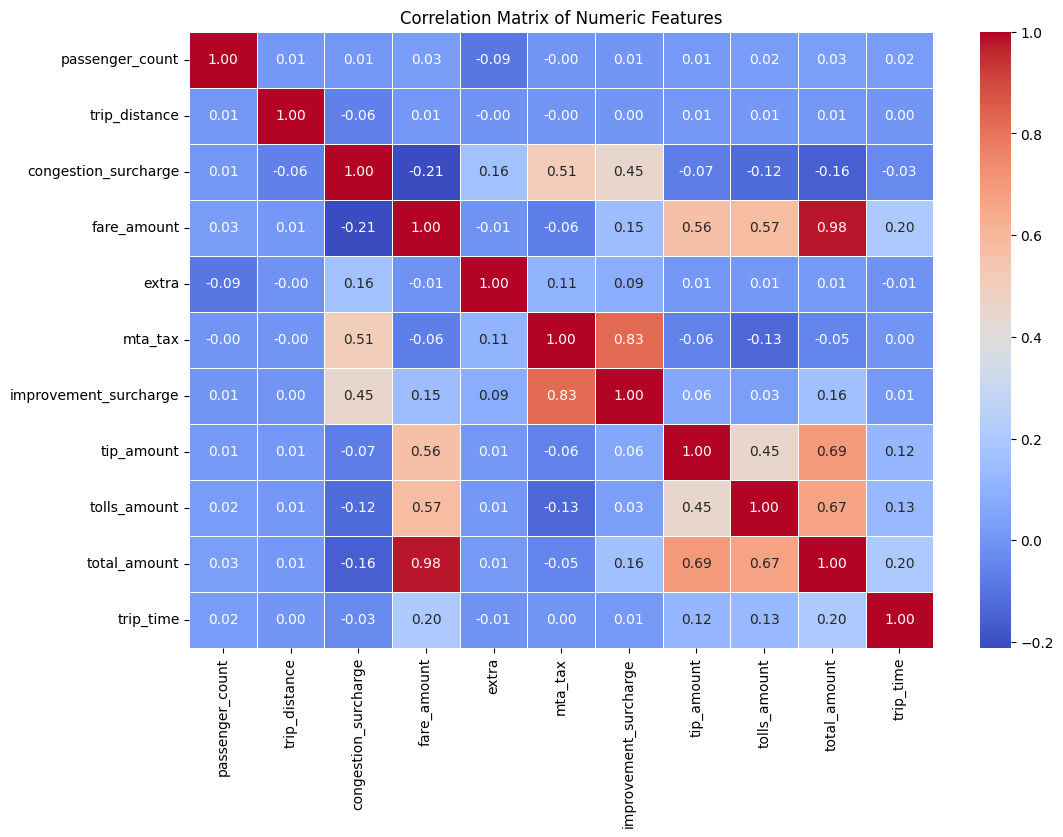

In [9]:
#Matriz correlation with new variable, trip_time
corr_matrix = numeric_cols.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [18]:
trip_distance = df[['trip_distance']]
trip_distance.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_distance,3588295.0,6.856861,690.848782,0.0,1.15,1.96,3.73,357192.65


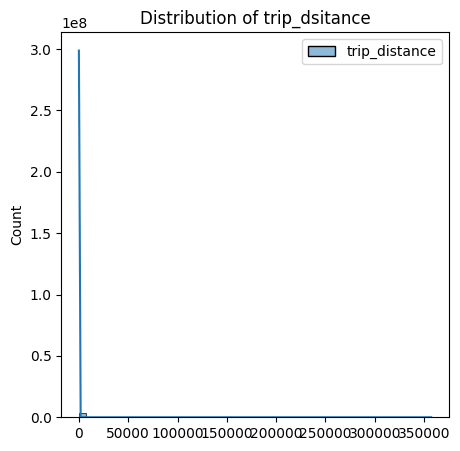

In [20]:
plt.figure(figsize=(5, 5))
sns.histplot(df[['trip_distance']], kde=True, bins=50)
plt.title('Distribution of trip_dsitance')
plt.show()

In [ ]:
#Remove outliers vs use data Q=90 y q=95
